<a href="https://colab.research.google.com/github/JoshuaClugston/modelingproject22/blob/main/model_animations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

Assuming, $\alpha_{1}\ll 1$, $\alpha_{2}\ll 1$, and $\gamma_{1}\ll 1$, the original model can be rewritten as: 
\begin{alignat*}{1}  
\frac{dN}{dt} &= N\beta_{1}(1-N)-\frac{r_{1}EN}{h+N},\\
\frac{dE}{dt} &=-\beta_{2}E + \frac{r_{1}EN}{h+N} - \frac{r_{2}RE}{h+E},\\
\frac{dR}{dt} &= -\beta_{3}R + \frac{r_{2}RE}{h+E} - \frac{r_{3}AR}{h+R},\\
\frac{dA}{dt} &= -\beta_{4}A + \frac{r_{3}AR}{h+R}.
\end{alignat*}

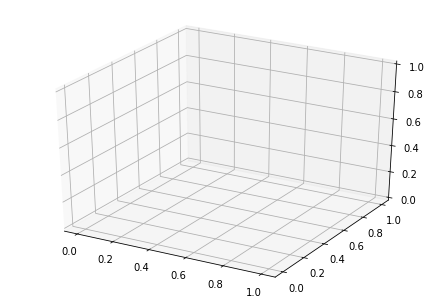

In [ ]:

"""define the model"""

def F(z, t, alpha3:float, beta1:float, beta2:float, beta3:float, beta4:float, r1:float, r2:float, r3:float, h=1/2):
  N,E,R,A = z
  dNN = beta1*N*(1-N)-r1*N*E/(h+N)
  dEE = r1*N*E/(h+N) - r2*E*R/(h+E) - beta2*E 
  dRR = r2*E*R/(h+E)- beta3*R - r3*R*A/(h+R)
  dAA = r3*R*A/(h+R) - beta4*A 
  return np.array([dNN, dEE, dRR, dAA])

"""parameter values without beta_{1}, as this is the bifurcation parameter."""

alpha1 = 0.103
alpha2 = 0.043 
alpha3 = 0.031
#beta1 = 0.042
beta2 = 0.016
beta3 = 0.052
beta4 = 0.047
r1 = 0.44
r2 = 0.193
r3 = 0.029

n=5000
t=np.arange(0,500,.1) # define time


fig = plt.figure()
ax = Axes3D(fig)

# initialize lines
line0, = ax.plot([], [], [], lw=2, color = 'red')
line1, = ax.plot([], [], [], lw=2, color = 'blue')
line2, = ax.plot([], [], [], lw=2, color = 'green')
line3, = ax.plot([], [], [], lw=2, color = 'black')

# initial conditions
x01 = [1.1, 1.1, 0.1, 0.]
x02 = [0.1,.1,.1,0.1]
x03 = [0.1, 0.1,0.1,0.1]
x04 = [0.1,0.1,0.1,0.1]

sol0 = odeint(F, x01, t, args=(alpha3, 0.3, beta2, beta3, beta3, r1, r2, r3))
sol1 = odeint(F, x02, t, args=(alpha3, 0.35, beta2, beta3, beta3, r1, r2, r3))
sol2 = odeint(F, x03, t, args=(alpha3, 0.45, beta2, beta3, beta3, r1, r2, r3))
sol3 = odeint(F, x03, t, args=(alpha3, 0.6, beta2, beta3, beta3, r1, r2, r3))

def init():
  line0.set_data([], [])
  line0.set_3d_properties([])
  '''line1.set_data([])
  line1.set_3d_properties([])
  line2.set_data([], [])
  line2.set_3d_properties([])
  line3.set_data([], [])
  line3.set_3d_properties([])'''
  return line0, #line1, line2, line3

def animate(i):
  line0.set_data(sol0[0:i,0],sol0[0:i,1])
  line0.set_3d_properties(sol0[0:i,2])
  #line1.set_data(sol1[0:i,0],sol1[0:i,1])
  #line1.set_3d_properties(sol1[0:i,2])
  #line2.set_data(sol2[0:i,0],sol2[0:i,1])
  #line2.set_3d_properties(sol2[0:i,2])
  #line3.set_data(sol3[0:i,0], sol3[0:i,1])
  #line3.set_3d_properties(sol3[0:i,2])
  return line0, #line1, line2, line3


ani = animation.FuncAnimation(fig, animate, init_func=init, frames = range(1,n+1), blit=True, interval=100,
save_count=50, repeat=False)

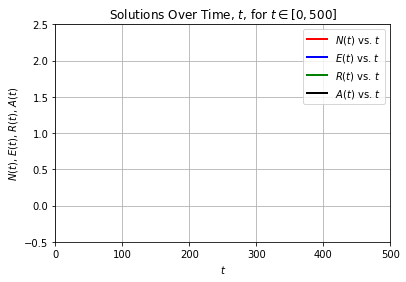

In [ ]:
fig2 = plt.figure()
ax0 = plt.axes(xlim=(0, 500), ylim=(-.5, 2.5))

line00, = ax0.plot([], [], lw=2, color = 'red', label = '$N(t)$ vs. $t$')
line01, = ax0.plot([], [], lw=2, color = 'blue', label = '$E(t)$ vs. $t$')
line02, = ax0.plot([], [], lw=2, color = 'green', label = '$R(t)$ vs. $t$')
line03, = ax0.plot([], [], lw=2, color = 'black', label = '$A(t)$ vs. $t$')

def init2():
  line00.set_data([],[])
  line01.set_data([],[])
  line02.set_data([],[]) 
  line03.set_data([],[])
  return line00, line01, line02, line03 

def animate2(i):
  # solutions 1,2,3 for initial conditions
  sol00 = odeint(F, x01, t, args=(alpha3, 0.3, beta2, beta3, beta3, r1, r2, r3))
  sol01 = odeint(F, x02, t, args=(alpha3, 0.35, beta2, beta3, beta3, r1, r2, r3))
  # set line data from solutions
  line00.set_data(t[0:i], sol00[0:i,0])
  line01.set_data(t[0:i], sol00[0:i,1])
  line02.set_data(t[0:i], sol00[0:i,2]) 
  line03.set_data(t[0:i], sol00[0:i,3])
  return line00, line01, line02, line03

ani2 = animation.FuncAnimation(fig2, animate2, init_func=init2, frames = range(1,5001), blit=True, interval=100,
save_count=50, repeat=False)

'''Plot'''
plt.grid()
plt.title("Solutions Over Time, $t$, for $t\in[0,500]$")
plt.legend(loc = 'best')
plt.xlabel('$t$')
plt.ylabel('$N(t)$, $E(t)$, $R(t)$, $A(t)$')



In [ ]:
from matplotlib import rc

rc('animation', html='html5')

# call first animation
ani

In [ ]:
# call second animation for all solutions versus time
ani2